In [4]:
# !pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [7]:
# import tensorflow_addons as tfa
# from tensorflow_addons.metrics import RSquare

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.metrics import r2_score

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [5]:
red_wine = pd.read_csv('data/red-wine.csv')
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
red_wine.shape

(1599, 12)

In [7]:
# dự đoán chất lượng rượu
# => 11 input features, 1 output

In [8]:
# create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head())

# split features and target
X_train = df_train.drop('quality', axis = 1)
X_valid = df_valid.drop('quality', axis = 1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [9]:
X_train.shape

(1119, 11)

In [10]:
X_valid.shape

(480, 11)

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import warnings
import time

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import iqr
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import iqr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from pandas_profiling import ProfileReport
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor as rf_reg
from sklearn.model_selection import RandomizedSearchCV as randomCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import feature_selection
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from plotnine import *
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
models = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    svm.SVR(),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
cv_entries = []

for model in models:
    start = time.time()
    model_name = model.__class__.__name__
    model1 = model.fit(X_train, y_train)
    y_pred = model1.predict(X_valid)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_valid, y_valid)
    end = time.time()
    cv_entries.append(
        [model_name, train_score.mean(), test_score.mean(), abs(end - start)]
    )

cv_df1 = pd.DataFrame(
    cv_entries, columns=["model_name", "train_score", "test_score", "run_time"]
)

cv_df1


,model_name,train_score,test_score,run_time
0,LinearRegression,0.330520,0.414316,0.021653
1,KNeighborsRegressor,0.434420,0.122365,0.032401
2,DecisionTreeRegressor,1.000000,0.032698,0.022903
3,RandomForestRegressor,0.921866,0.527433,0.703933
4,SVR,0.170371,0.179823,0.217651


### **Xây dựng model**

In [11]:
# bài tuyến tính 

In [12]:
# 6 = (số field input + số field output)/2 = (11+1)/2 = 6
model = keras.Sequential()
# input layer
model.add(
    layers.Dense(
        6, activation="relu", input_shape=[11] # (11+1)/2 = 6
    )  
)  
model.add(layers.Dense(6, activation="relu"))

#output layer 
model.add(layers.Dense(1))


In [13]:
'''
add càng nhiều layers.Dense là đi về chiều sâu, layers.Dense(6, ...) là mở rộng về chiều rộng (số 6 á)
'''

'\nadd càng nhiều layers.Dense là đi về chiều sâu, layers.Dense(6, ...) là mở rộng về chiều rộng (số 6 á)\n'

In [14]:
# tối ưu model
# với biên dịch regression: dùng tối ưu hóa optimizer là adam, loss function là mae
model.compile(optimizer="adam", loss="mae")  # dùng mae hay mse đều ok


In [15]:
# model sau khi biên dịch ...
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [16]:
'''
p1 = 6*11+6 = 72
p2 = 6*6+6 = 42
p3 - 6*1+1 = 7
'''

'\np1 = 6*11+6 = 72\np2 = 6*6+6 = 42\np3 - 6*1+1 = 7\n'

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience=20, 
    restore_best_weights = True
)

In [18]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32, # 1 batch = 32 (default), với dataset lớn thì nên để default thôi
    epochs=200, # loop lại 200 lần
    callbacks=[early_stopping],
    verbose=0 # turn off training log
)


In [19]:
history

In [20]:
history_df = pd.DataFrame(history.history)
history_df

,loss,val_loss
0,4.560919,3.760694
1,2.762363,2.242523
2,1.485488,1.185559
3,0.979919,0.972435
4,0.827391,0.849100
...,...,...
143,0.498759,0.542303
144,0.498851,0.515177
145,0.501126,0.504193
146,0.503636,0.509660


In [21]:
red_wine.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

minimum validation loss: 0.4992477297782898


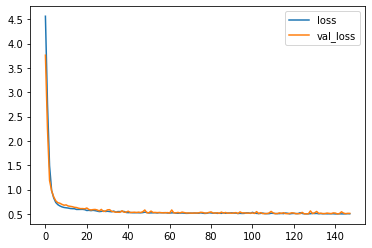

In [22]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('minimum validation loss: {}'.format(history_df['val_loss'].min()))

In [23]:
'''
loss là loss của train, val_loss là loss của test
với std = 0.8, model này phù hợp với dataset
'''

'\nloss là loss của train, val_loss là loss của test\nvới std = 0.8, model này phù hợp với dataset\n'

### **Predict**

In [24]:
y_valid_hat = model.predict(X_valid)
y_valid_hat[:5]

array([[5.1043468],
       [5.492869 ],
       [5.512165 ],
       [5.5900354],
       [5.0298495]], dtype=float32)

In [25]:
y_valid_hat.round(0)[:5]

array([[5.],
       [5.],
       [6.],
       [6.],
       [5.]], dtype=float32)

In [26]:
y_valid[:5]

0     5
3     6
7     7
11    5
23    5
Name: quality, dtype: int64

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mean_absolute_error(y_valid, y_valid_hat.round(0)).round(2)

0.45

In [49]:
y_valid_hat = model.predict(X_valid)
y_valid_hat_lst = y_valid_hat.round(0).reshape(1, len(y_valid_hat))[0]
y_valid_lst = y_valid.values


# y_valid_hat_lst[:20]
# y_valid_lst[:20]

array([5, 6, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6, 4, 5, 5, 6, 5, 5, 6, 5])

In [107]:
metric = tfa.metrics.r_square.RSquare()
metric.update_state(y_valid_lst, y_valid_hat_lst)
r2 = metric.result()
r2.numpy().round(4)


0.2231

*R_Score*

In [106]:
r2_score(y_valid_lst, y_valid_hat_lst).round(4)

0.2231

### **Save model**

In [ ]:
model.save('ANN_wine.h5') # đuôi h5 nha

In [ ]:
from tensorflow.keras.models import load_model
model_load = load_model('ANN_wine.h5')

In [ ]:
y_hat_valid_now = model_load.predict(X_valid)

In [ ]:
y_hat_valid_now[:3]

array([[5.189112],
       [5.625161],
       [5.462291]], dtype=float32)

## **Cải thiện model**

### **Dùng Dropout**

In [ ]:
# chỉ cần khai báo input_shape=[11] 1 lần là dc
# # 6 = (số field input + số field output)/2 =
model_1 = keras.Sequential()
model_1.add(layers.Dense(6, activation="relu", input_shape=[11]))  # (11+1)/2 = 6
model_1.add(layers.Dropout(0.3))  
model_1.add(layers.Dense(6, activation="relu"))
model_1.add(layers.Dropout(0.3))  
model_1.add(layers.Dense(1))


In [ ]:
model_1.compile(optimizer="adam", loss="mae")  # dùng mae hay mse đều ok

In [ ]:
history_1 = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0 # turn off training log
)


In [ ]:
history_df_1 = pd.DataFrame()
red_wine.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

minimum validation loss: 0.5053485631942749


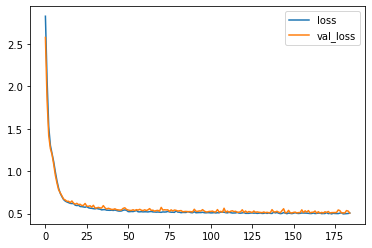

In [ ]:
history_df_1 = pd.DataFrame(history.history)
history_df_1.loc[:, ['loss', 'val_loss']].plot()
print('minimum validation loss: {}'.format(history_df_1['val_loss'].min()))

### **Dùng BatchNormalization**

In [ ]:
# chỉ cần khai báo input_shape=[11] 1 lần là dc
# # 6 = (số field input + số field output)/2 =
model_2 = keras.Sequential()
model_2.add(layers.Dense(6, activation="relu", input_shape=[11]))  # (11+1)/2 = 6
# model_2.add(layers.Dropout(0.3))
model_2.add(layers.BatchNormalization())

model_2.add(layers.Dense(6, activation="relu"))
# model_1.add(layers.Dropout(0.3))
model_2.add(layers.BatchNormalization())

model_2.add(layers.Dense(1))


In [ ]:
model_2.compile(optimizer="adam", loss="mae")  # dùng mae hay mse đều ok

In [ ]:
history_2 = model_2.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0 # turn off training log
)


minimum validation loss: 0.5053485631942749


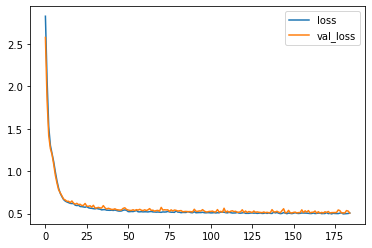

In [ ]:
history_df_2 = pd.DataFrame()
red_wine.quality.describe()

history_df_2 = pd.DataFrame(history.history)
history_df_2.loc[:, ['loss', 'val_loss']].plot()
print('minimum validation loss: {}'.format(history_df_2['val_loss'].min()))

### **Both Dropout and BatchNormolization**

In [ ]:
# chỉ cần khai báo input_shape=[11] 1 lần là dc
# # 6 = (số field input + số field output)/2 =
model_both = keras.Sequential()
model_both.add(layers.Dense(6, activation="relu", input_shape=[11]))  # (11+1)/2 = 6
model_both.add(layers.Dropout(0.3))
model_both.add(layers.BatchNormalization())

model_both.add(layers.Dense(6, activation="relu"))
model_both.add(layers.Dropout(0.3))
model_both.add(layers.BatchNormalization())

model_both.add(layers.Dense(1))


In [ ]:
model_both.compile(optimizer="adam", loss="mae")  # dùng mae hay mse đều ok

In [ ]:
history_both = model_both.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0 # turn off training log
)

minimum validation loss: 0.5053485631942749


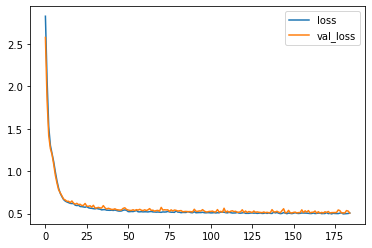

In [ ]:
history_df_both = pd.DataFrame()
red_wine.quality.describe()

history_df_both = pd.DataFrame(history.history)
history_df_both.loc[:, ['loss', 'val_loss']].plot()
print('minimum validation loss: {}'.format(history_df_both['val_loss'].min()))

## **Tuning Parameters - HyperPrams**

In [14]:
def build_regressor(optimizer):
    model = keras.Sequential(
        [
            layers.Dense(6, activation="relu", input_shape=[11]),
            layers.Dense(6, activation="relu"),
            layers.Dense(1),
        ]
    )

    model.compile(optimizer="adam", loss="mae", metrics=["mse", "mae"])
    return model


In [15]:
regressor = KerasRegressor(build_fn=build_regressor)
parameters = {
    "batch_size": [32, 64, 128], # [32, 64, 128]
    "epochs": [100, 150, 200], # [100, 150, 200]
    "optimizer": ["adam", "rmsprop", "sgd"], # ["adam", "rmsprop", "sgd"]
}

grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=parameters,  
    # scoreing = 'neg_mean_squared_error', 
    cv=5 # 5 lần thực hiện
)

grid_search = grid_search.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 1ms/step - loss: 0.6917 - mse: 0.8169 - mae: 0.6917
Epoch 58/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6890 - mse: 0.8099 - mae: 0.6890
Epoch 59/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6866 - mse: 0.8031 - mae: 0.6866
Epoch 60/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6843 - mse: 0.7959 - mae: 0.6843
Epoch 61/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6794 - mse: 0.7869 - mae: 0.6794
Epoch 62/200
7/7 [==============================] - 0s 1ms/step - loss: 0.6766 - mse: 0.7810 - mae: 0.6766
Epoch 63/200
7/7 [==============================] - 0s 1ms/step - loss: 0.6751 - mse: 0.7768 - mae: 0.6751
Epoch 64/200
7/7 [==============================] - 0s 1ms/step - loss: 0.6715 - mse: 0.7687 - mae: 0.6715
Epoch 65/200
7/7 [==============================] - 0s 1ms/step - loss: 0.6689 - mse: 0.7636 - mae: 0.6689

In [16]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print('best_parameters: ', best_parameters)
print('best_score: ', best_score) 

best_parameters:  {'batch_size': 32, 'epochs': 150, 'optimizer': 'rmsprop'}
best_score:  -0.5148576200008392


In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32, # 1 batch = 32 (default), với dataset lớn thì nên để default thôi
    epochs=150, # loop lại 200 lần
    callbacks=[early_stopping],
    verbose=0 # turn off training log
)


In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('minimum validation loss: {}'.format(history_df['val_loss'].min()))

In [21]:
y_valid_hat = grid_search.predict(X_valid)
y_valid_hat_lst = y_valid_hat.round(0).reshape(1, len(y_valid_hat))[0]
y_valid_lst = y_valid.values


y_valid_hat_lst[:20]
y_valid_lst[:20]

array([5, 6, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6, 4, 5, 5, 6, 5, 5, 6, 5])

In [22]:
r2_score(y_valid_lst, y_valid_hat_lst).round(4)

0.1985